In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Remove columns with more than 40% null values

df = df.dropna(axis=1, thresh=600)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# keep only numeric columns from df

df = df.select_dtypes(include=['int64', 'float64'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

# Exploración de datos

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


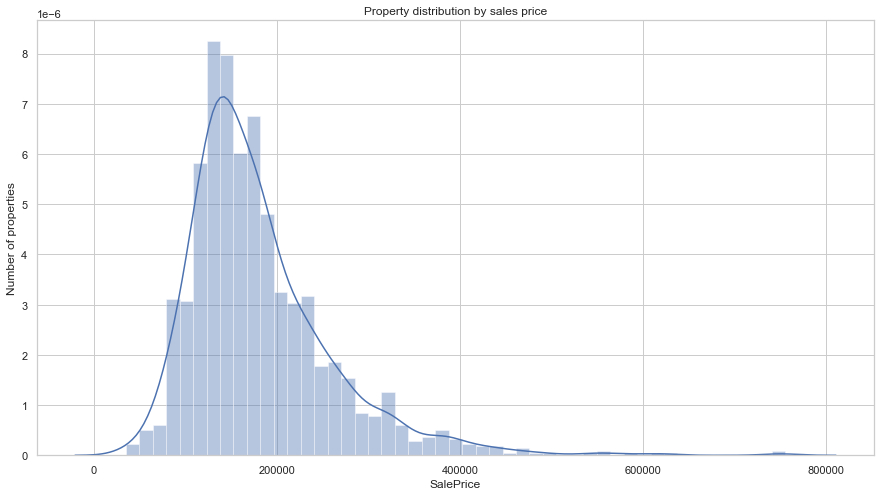

In [7]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

plt.title('Property distribution by sales price')
plt.xlabel('Sale Price')
plt.ylabel('Number of properties')

sns.distplot(df.SalePrice)

plt.show()

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Property distribution by sales price'}, xlabel='SalePrice'>

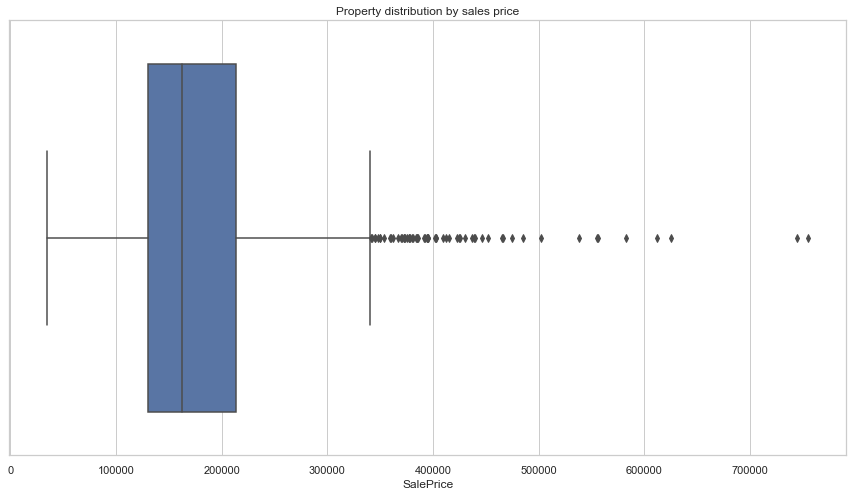

In [8]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

plt.title('Property distribution by sales price')
plt.xlabel('Sale Price')

sns.boxplot(df.SalePrice)

In [9]:
# Find distribution per quantile

iqr = df.SalePrice.quantile(.75) - df.SalePrice.quantile(.25)

max_sale_price = df.SalePrice.quantile(.75) + (iqr*1.5)

min_sale_price = df.SalePrice.quantile(.25) - (iqr*1.5)

df.SalePrice.quantile(.75)

214000.0

In [10]:
# Remove outliers

df = df[df['SalePrice']<= max_sale_price]

df.shape

(1399, 38)

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Property distribution by sales price'}, xlabel='SalePrice'>

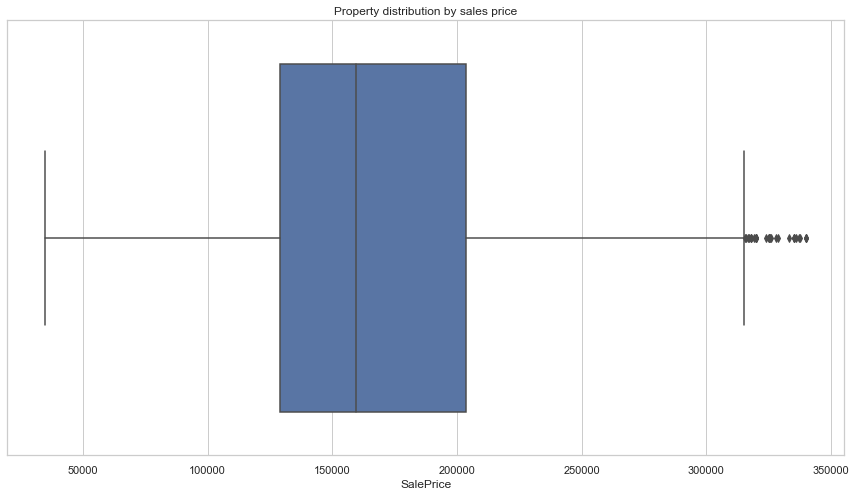

In [11]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

plt.title('Property distribution by sales price')
plt.xlabel('Sale Price')

sns.boxplot(df.SalePrice)

<AxesSubplot:title={'center':'Correlation between characteristic and Sale Price'}, xlabel='Characteristic', ylabel='Correlation'>

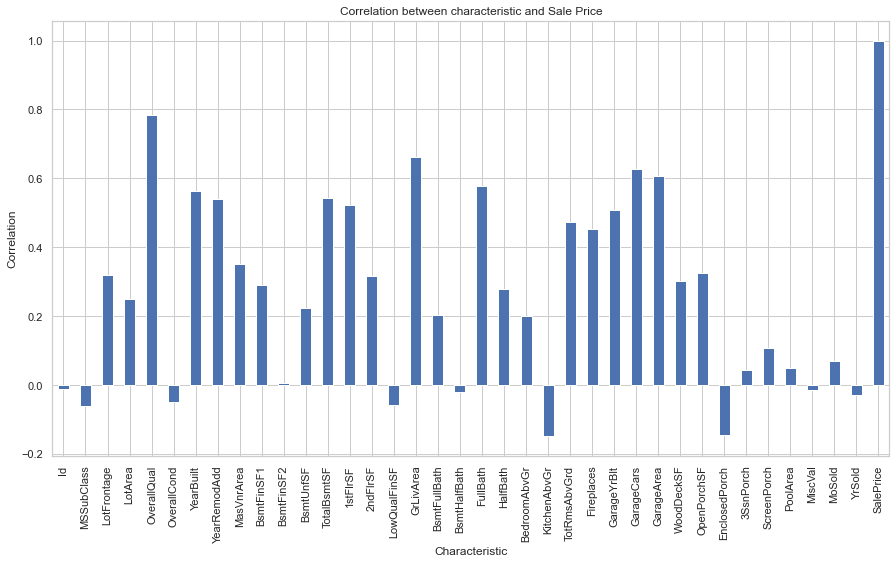

In [48]:
correlation = df.corr()

plt.figure(figsize=(15,8))

plt.title('Correlation between characteristic and Sale Price')
plt.xlabel('Characteristic')
plt.ylabel('Correlation')


correlation.SalePrice.plot(kind='bar')

In [49]:
influencing_columns = correlation[['SalePrice']]

print(influencing_columns.shape)

influencing_columns = influencing_columns[influencing_columns['SalePrice']>.5]

influencing_columns.index

(38, 1)


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<AxesSubplot:>

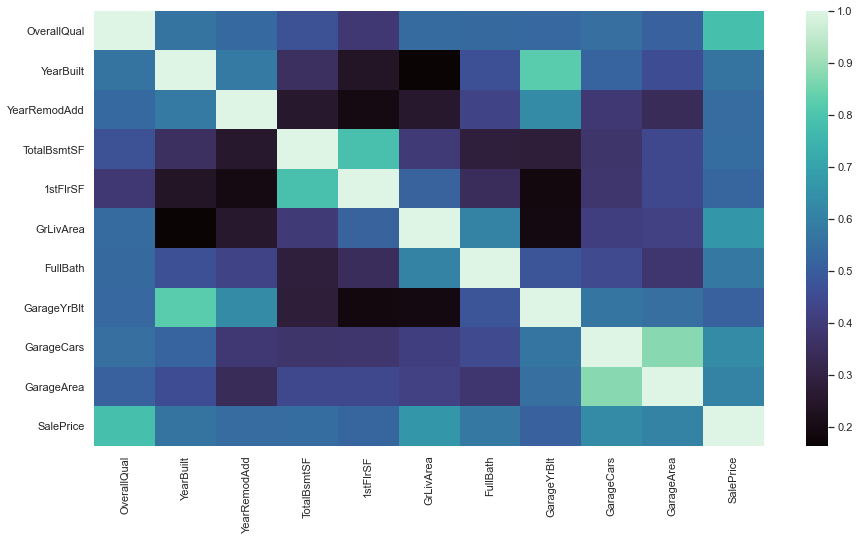

In [52]:
correlation = df.corr()

correlation = correlation[influencing_columns.index]

correlation = correlation.loc[influencing_columns.index]


plt.figure(figsize=(15,8))


sns.heatmap(correlation, cmap="mako")

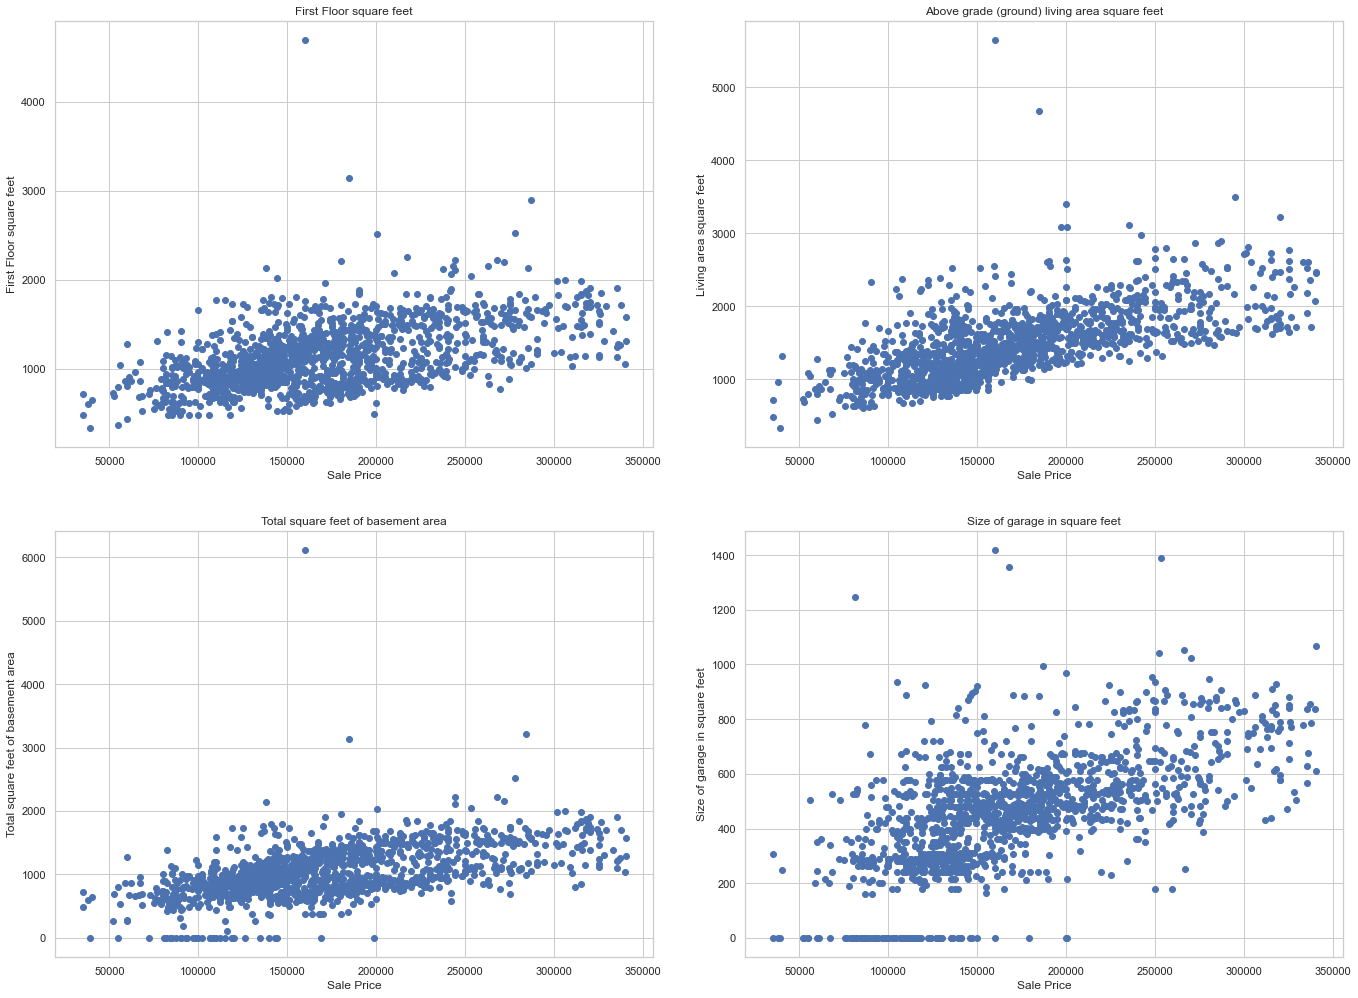

In [55]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,15))

fig.tight_layout(pad=5.0)


ax[0,0].scatter(df.SalePrice, df['1stFlrSF'])
ax[0,0].set_title('First Floor square feet')
ax[0,0].set_xlabel('Sale Price')
ax[0,0].set_ylabel('First Floor square feet')

ax[0,1].scatter(df.SalePrice, df.GrLivArea)
ax[0,1].set_title('Above grade (ground) living area square feet')
ax[0,1].set_xlabel('Sale Price')
ax[0,1].set_ylabel('Living area square feet')


ax[1,0].scatter(df.SalePrice, df.TotalBsmtSF)
ax[1,0].set_title('Total square feet of basement area')
ax[1,0].set_xlabel('Sale Price')
ax[1,0].set_ylabel('Total square feet of basement area')


ax[1,1].scatter(df.SalePrice, df.GarageArea)
ax[1,1].set_title('Size of garage in square feet')
ax[1,1].set_xlabel('Sale Price')
ax[1,1].set_ylabel('Size of garage in square feet')


plt.show()

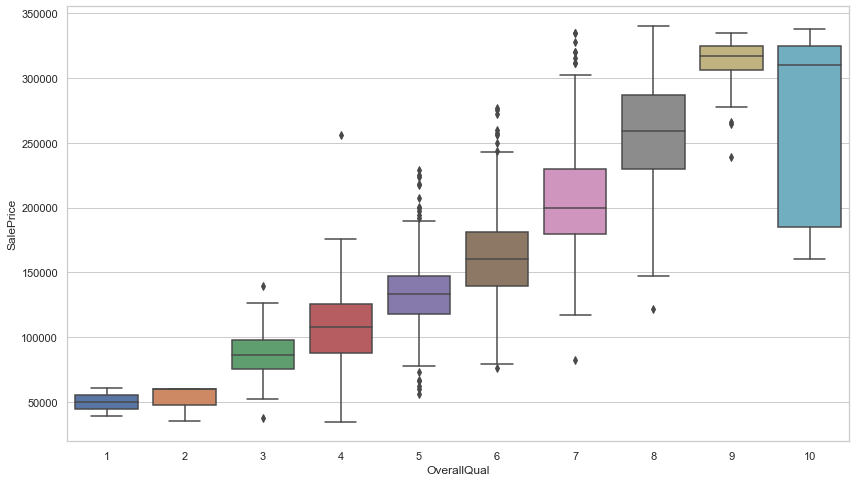

In [16]:
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data)

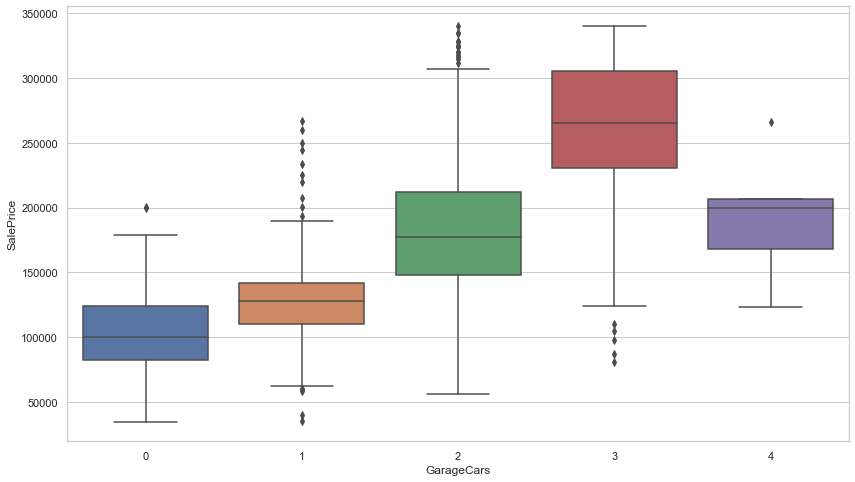

In [17]:
data = pd.concat([df['SalePrice'], df['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x="GarageCars", y="SalePrice", data=data)

# Reducing meaningful columns with PCA

In [18]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
scaler = StandardScaler()
norm_data =  scaler.fit_transform(df)

In [21]:
df_norm = pd.DataFrame(norm_data, index = df.index, columns = df.columns).fillna(0).astype('float64')
df_norm.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.733090,0.058720,-0.170510,-0.204916,0.792970,-0.528822,1.097354,0.917091,0.663739,0.674064,...,-0.736078,0.245191,-0.364272,-0.113179,-0.267373,-0.064858,-0.089594,-1.595626,0.135712,0.646235
1,-1.730724,-0.876115,0.459667,-0.066726,0.012826,2.154935,0.197316,-0.390176,-0.565602,1.309209,...,1.711462,-0.683336,-0.364272,-0.113179,-0.267373,-0.064858,-0.089594,-0.485591,-0.617704,0.190222
2,-1.728358,0.058720,-0.044474,0.131547,0.792970,-0.528822,1.030684,0.868673,0.450486,0.160344,...,-0.736078,-0.044022,-0.364272,-0.113179,-0.267373,-0.064858,-0.089594,0.994456,0.135712,0.899575
3,-1.725992,0.292428,-0.380568,-0.072734,0.792970,-0.528822,-1.836103,-0.680680,-0.565602,-0.470131,...,-0.736078,-0.150575,4.063351,-0.113179,-0.267373,-0.064858,-0.089594,-1.595626,-1.371121,-0.510685
4,-1.723626,0.058720,0.627713,0.493245,1.573115,-0.528822,0.997350,0.771839,1.629649,0.554974,...,0.840860,0.595291,-0.364272,-0.113179,-0.267373,-0.064858,-0.089594,2.104491,0.135712,1.347142


In [22]:
pca = PCA()
pca.fit(df_norm)

PCA()

In [23]:
pca.explained_variance_ratio_

array([1.92001112e-01, 8.63461394e-02, 6.95814746e-02, 5.48557735e-02,
       4.08204063e-02, 3.27479465e-02, 3.07948226e-02, 3.05905843e-02,
       2.94193932e-02, 2.90362129e-02, 2.87814645e-02, 2.75724157e-02,
       2.72777707e-02, 2.62420164e-02, 2.60172354e-02, 2.41047128e-02,
       2.32854403e-02, 2.20432660e-02, 2.18664213e-02, 2.11655063e-02,
       2.00380053e-02, 1.78273136e-02, 1.66796286e-02, 1.56635988e-02,
       1.38455057e-02, 1.13101111e-02, 1.02492165e-02, 8.79144162e-03,
       8.27601361e-03, 7.14659751e-03, 6.38019788e-03, 5.63141232e-03,
       4.08078639e-03, 3.86425808e-03, 3.08843104e-03, 2.57736671e-03,
       3.78655428e-32, 1.03982996e-33])

Text(0, 0.5, 'Varianza explicada acumulada')

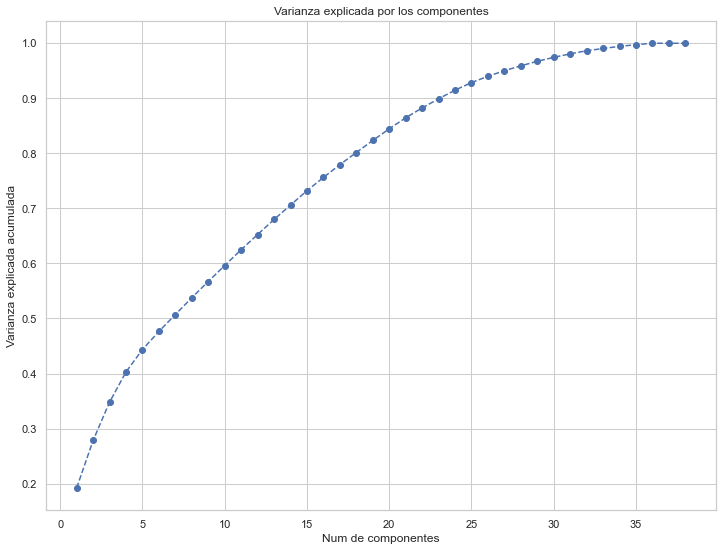

In [24]:
plt.figure(figsize=(12,9))
plt.plot(range(1,39),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title("Varianza explicada por los componentes")
plt.xlabel("Num de componentes")
plt.ylabel("Varianza explicada acumulada")

In [25]:
pca = PCA(n_components = 18)
pca.fit(df_norm)

PCA(n_components=18)

In [26]:
df_transform = pca.transform(df_norm)

In [27]:
cols = ['C' + str(x) for x in range(1,19)]

cols

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18']

In [28]:
data_pca = pd.DataFrame(df_transform, index = df_norm.index, columns =cols)
data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18
0,1.875257,0.380902,-1.756030,-1.952344,0.616778,0.757419,-1.185607,-0.468674,-0.921377,0.904540,0.311753,0.284638,0.139570,-0.007606,0.538131,-1.436980,-1.268163,0.374916
1,0.233190,-1.256283,1.290583,-0.192747,-1.727038,0.870955,2.697772,-2.626516,-0.487709,-0.053836,0.684670,-1.447180,1.134689,-0.813129,-0.750242,-1.093077,-0.450397,0.475147
2,2.173442,0.223974,-1.500905,-1.373669,-0.166357,-0.353476,-0.245134,-0.342597,-0.627211,0.971916,-0.176278,0.129359,-0.738247,0.938138,0.370987,-0.674444,-0.231606,0.673135
3,-0.291165,1.086174,0.688034,-0.173758,0.169493,0.318205,-1.390112,1.247363,-1.200179,0.927008,-1.780636,-3.291798,0.558270,1.750528,1.663709,-1.038322,-0.783537,0.287815
4,5.038538,1.074894,-0.402112,-1.421086,-0.049113,-0.573585,0.248856,-0.841961,-1.006297,0.291981,-0.438232,-0.138600,-1.256516,1.122615,0.127017,-1.011788,0.184108,1.129901


In [29]:
df_pca_comp = pd.DataFrame( data = pca.components_,
                           columns = df_norm.columns.values,
                           index = cols)
df_pca_comp.shape

(18, 38)

<AxesSubplot:>

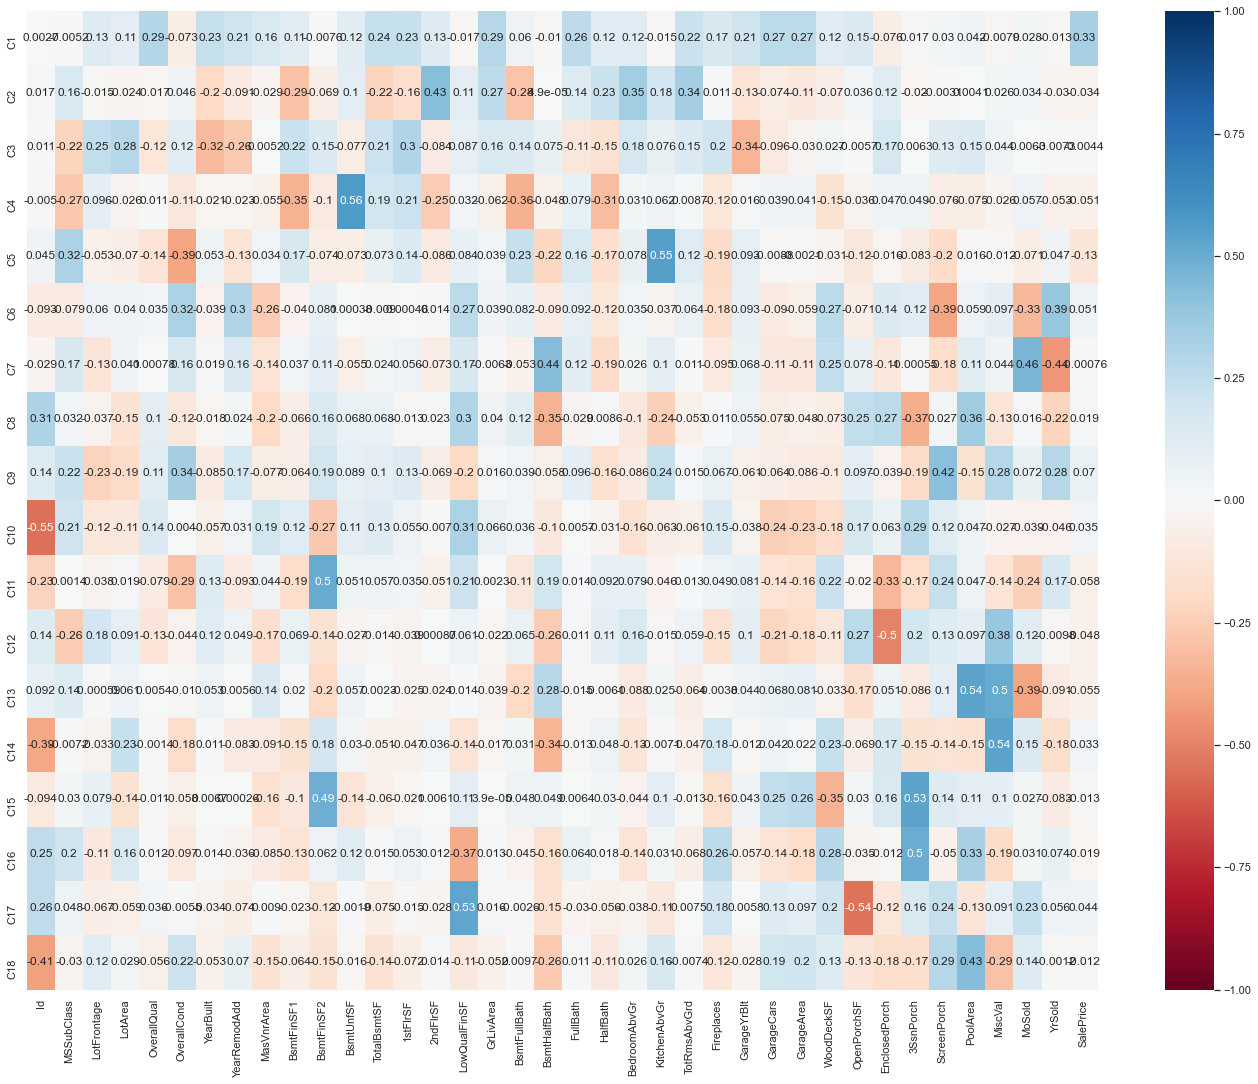

In [30]:
plt.figure(figsize=(24,18))

sns.heatmap(df_pca_comp, vmin=-1, vmax=1,cmap='RdBu',annot=True)

# Regresion lineal

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [32]:
corr = df.corr()

corr['AbsSalePrice'] = corr.SalePrice.abs()

corr = corr.sort_values(by='AbsSalePrice', ascending=False)

corr = corr.drop('AbsSalePrice', axis=1)

pca_columns = corr[:14].index

reduced_df = df[pca_columns].fillna(0).astype('float64')

reduced_df.shape

(1399, 14)

In [33]:
# Setting dependent and independent variables

x = reduced_df.drop('SalePrice', axis=1)

y = reduced_df.SalePrice

In [34]:
# Creating train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .1, random_state = 77)

In [35]:
# Building linear regression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

In [36]:
# Getting coefficients for each car

coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])

coeff_df

,Coefficient
OverallQual,14667.970794
GrLivArea,30.706799
GarageCars,8449.351908
GarageArea,24.817919
FullBath,-222.369429
YearBuilt,280.219016
TotalBsmtSF,10.987999
YearRemodAdd,363.669080
1stFlrSF,3.939119
GarageYrBlt,-4.905454


In [37]:
# Getting model scores

train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)

print(train_score)
print(test_score)

0.7855292940340447
0.8313781059153702


In [63]:
# Testing model with test set

predicted = linreg.predict(x_test)

df_pred = pd.DataFrame ({'Actual':y_test, 'Predicted':predicted})

df_pred

,Actual,Predicted
114,259500.0,190310.191944
183,200000.0,219472.272048
335,228950.0,185782.309902
194,127000.0,113422.535267
946,143000.0,142175.826775
...,...,...
650,205950.0,203484.135583
1377,117000.0,141300.175866
290,233230.0,245233.627641
342,87500.0,76999.339920


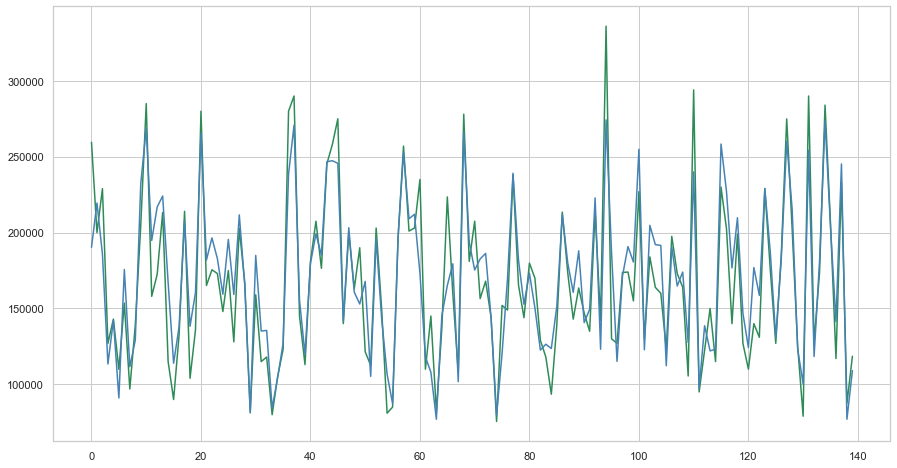

In [64]:
# Plotting test results

df_pred.reset_index(inplace=True)

plt.figure(figsize=(15,8))

plt.plot(df_pred.Actual, color='seagreen', label='Actual')
plt.plot(df_pred.Predicted, color='steelblue', label='Predicted')

In [40]:
# getting model errors

from sklearn import metrics


In [41]:
mean_sqr_err = metrics.mean_squared_error(y_test, predicted)

mean_abs_err = metrics.mean_absolute_error(y_test, predicted)

print("Mean square error: ", mean_sqr_err)
print("Mean absolute error: ", mean_abs_err)

Mean square error:  511151369.65453446
Mean absolute error:  17292.326955087483


# Ridge regression

In [42]:
# Creating ridge

rr = Ridge()
rr.fit(x_train, y_train)

Ridge()

In [43]:
# trainning ridge

rr100 = Ridge(alpha=100)
rr100.fit(x_train, y_train)

Ridge(alpha=100)

In [44]:
# getting ridge scores

ridge_train_score = rr.score(x_train, y_train)
ridge_test_score = rr.score(x_test, y_test)
ridge100_train_score = rr100.score(x_train, y_train)
ridge100_test_score = rr100.score(x_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", ridge_train_score)
print("ridge regression test score low alpha:", ridge_test_score)
print("ridge regression train score high alpha:", ridge100_train_score)
print("ridge regression test score high alpha:", ridge100_test_score)

linear regression train score: 0.7855292940340447
linear regression test score: 0.8313781059153702
ridge regression train score low alpha: 0.785529062674149
ridge regression test score low alpha: 0.8314467733527077
ridge regression train score high alpha: 0.7842761046325619
ridge regression test score high alpha: 0.8348907862639284


In [45]:
# testing ridge against test sets

predicted_ridge = rr100.predict(x_test)
predicted_ridge = pd.DataFrame({'Actual':y_test, 'Predicted':predicted_ridge})
predicted_ridge

,Actual,Predicted
114,259500.0,191393.493556
183,200000.0,222051.047992
335,228950.0,184235.823035
194,127000.0,115682.896612
946,143000.0,146273.895957
...,...,...
650,205950.0,205233.123893
1377,117000.0,143919.119015
290,233230.0,245283.501877
342,87500.0,78268.311603


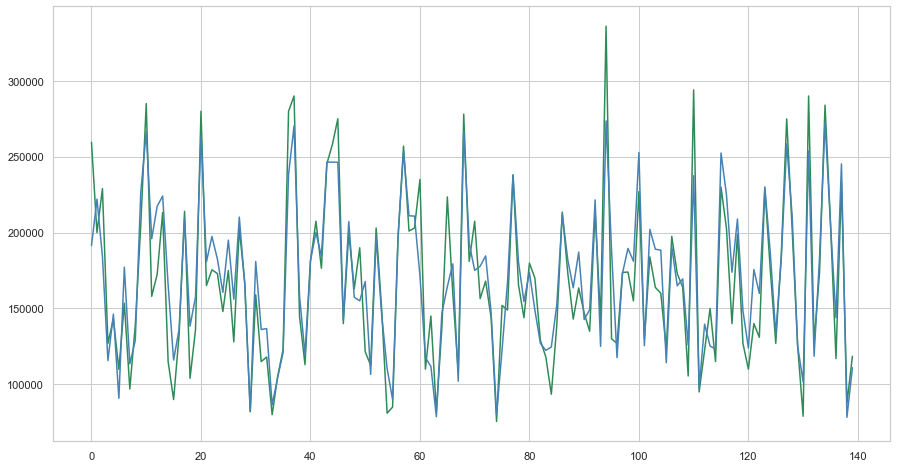

In [46]:
# Plotting test results

predicted_ridge.reset_index(inplace=True)

plt.figure(figsize=(15,8))

plt.plot(predicted_ridge.Actual, color='seagreen', label='Actual')
plt.plot(predicted_ridge.Predicted, color='steelblue', label='Predicted')

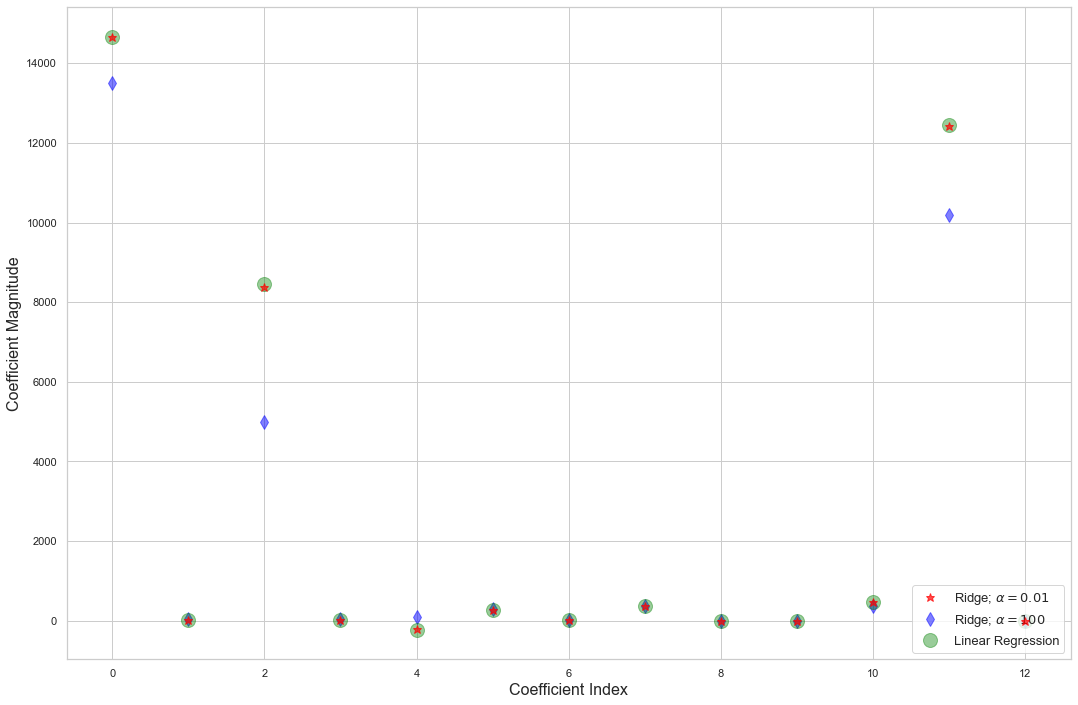

In [47]:
fig = plt.figure(facecolor='w',figsize=(18, 12))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=9,\
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=10,\
         color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=14,\
         color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()